<a href="https://colab.research.google.com/github/raima2000/Pharmacovigilance_detection/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import nltk

In [ ]:
sheet_name="Sample"

In [ ]:
df=pd.read_excel("/content/PsyTAR_dataset.xlsx",sheet_name=sheet_name)

In [ ]:
df['comment'] = df['comment'].apply(lambda x: str(x) if isinstance(x, (int, float)) else x)
df['comment'] = df['comment'].apply(lambda x: re.sub(r'[!@#$%^&*()_+={}\[\]:;"\'<>,.?/\|\\]', '', x))
df['comment'] = df['comment'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['comment']

0      I am detoxing from Lexapro now I slowly cut my...
1      Just TWO tablets of Lexapro 10mg completely de...
2      Be careful with this medication  This was my f...
3      It didnt help me out at all My anxiety is wors...
4      I would not suggest taking this medication I d...
                             ...                        
886    I almost lost everyone in my life that I loved...
887                        as good as it gets at a price
888    No longer have crying jags  Able to deal with ...
889    I have been taking 75mg dosage for a year now ...
890    I was never one to take any kind of drugs  I w...
Name: comment, Length: 891, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
try:
   nltk.word_tokenize(df['comment'])
except Exception as e:
    print(f"Error: {e}")


Error: expected string or bytes-like object


In [ ]:
#df['comment'].unique()


In [ ]:
nan_variations = ['nan', 'NAN', 'NaN', 'nAn', 'Nan']  # Add more if needed

# Replace all variations with the standard NaN representation
df.replace(nan_variations, np.nan, inplace=True)

In [ ]:
df1 = df.dropna(subset=['comment'])

# Print the cleaned DataFrame
df1.head(10)

,index,comment_index,comment_id,drug_id,rating,disorder,side-effect,comment,gender,age,dosage_duration,date,category
0,1,372,1,lexapro.1,1,depression and anxiety,"extreme weight gain, short-term memory loss, h...",I am detoxing from Lexapro now I slowly cut my...,F,39.0,5 years20mg 1X D,2011-02-21 00:00:00,ssri
1,2,4,2,lexapro.2,1,depression,COMPLETELY DESTROYED SEXUALLY FUNCTIONING - EV...,Just TWO tablets of Lexapro 10mg completely de...,M,40.0,2 days10mg 1X D,2016-08-21 00:00:00,ssri
2,3,419,3,lexapro.3,1,depression,"Nausea, Blurred Vision, 3 to 5 hours sleep, Su...",Be careful with this medication This was my f...,M,50.0,2 days10mg 1X D,2010-10-04 00:00:00,ssri
3,4,1305,4,lexapro.4,1,"severe gad, minor depression, etc","Plenty! First 10 days were HORRIBLE, like a lo...",It didnt help me out at all My anxiety is wors...,M,20.0,7 weeks,2007-07-05 00:00:00,ssri
4,5,909,5,lexapro.5,1,"depression, anxiety","Chronic cough, weight gain, no sexual interest...",I would not suggest taking this medication I d...,F,43.0,2 months,2008-10-04 00:00:00,ssri
5,6,918,6,lexapro.6,1,depression,"Muscle spasms, muscle twitching, muscle sorene...",I took Lexapro for 3 days in 10mg doses and ha...,M,55.0,3 days,2008-09-15 00:00:00,ssri
8,9,668,9,lexapro.9,1,social anxiety. depression.,Excessive perspiration. Erectile dysfunction. ...,Utterly useless,M,34.0,2 years,2009-07-14 00:00:00,ssri
9,10,1609,10,lexapro.10,1,depression,Took a while to have an effect on mood obvious...,Have your blood pressure checked even if like ...,M,46.0,6 months,2007-01-13 00:00:00,ssri
10,11,541,11,lexapro.11,1,"depression, anxiety","Heavy sedation, Jaw Clenching, Inability to or...",Tired it four months Very bad side effects Did...,M,30.0,4 months20mg 1X D,2010-03-02 00:00:00,ssri
11,12,347,12,lexapro.12,1,depression,emotionless. Zombie effect. Loss of memory.,When i took lexapro i walked around in a zombi...,F,19.0,1 years10 1X D,4/12/2011Email,ssri


In [ ]:

df1['comment'] = df['comment'].str.lower()

# Print the DataFrame
print(df1)

     index  comment_index  comment_id        drug_id  rating  \
0        1            372           1      lexapro.1       1   
1        2              4           2      lexapro.2       1   
2        3            419           3      lexapro.3       1   
3        4           1305           4      lexapro.4       1   
4        5            909           5      lexapro.5       1   
..     ...            ...         ...            ...     ...   
886    887           1860         224  effexorXR.224       5   
887    888           1459         225  effexorXR.225       5   
888    889           1494         226  effexorXR.226       5   
889    890           1028         227  effexorXR.227       5   
890    891           1892         228  effexorXR.228       5   

                                disorder  \
0                 depression and anxiety   
1                             depression   
2                             depression   
3      severe gad, minor depression, etc   
4          

<ipython-input-10-45c856503285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['comment'] = df['comment'].str.lower()


In [ ]:
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

# Assuming 'df' is your DataFrame with a 'comment' column
df1['comment'] = df1['comment'].apply(lambda x: str(x))  # Ensure 'comment' is a string
df1['tokens'] = df1['comment'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-11-0a6d4c11e9f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['comment'] = df1['comment'].apply(lambda x: str(x))  # Ensure 'comment' is a string
<ipython-input-11-0a6d4c11e9f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tokens'] = df1['comment'].apply(lambda x: word_tokenize(x))


In [ ]:
df1['tokens']

0      [i, am, detoxing, from, lexapro, now, i, slowl...
1      [just, two, tablets, of, lexapro, 10mg, comple...
2      [be, careful, with, this, medication, this, wa...
3      [it, didnt, help, me, out, at, all, my, anxiet...
4      [i, would, not, suggest, taking, this, medicat...
                             ...                        
886    [i, almost, lost, everyone, in, my, life, that...
887               [as, good, as, it, gets, at, a, price]
888    [no, longer, have, crying, jags, able, to, dea...
889    [i, have, been, taking, 75mg, dosage, for, a, ...
890    [i, was, never, one, to, take, any, kind, of, ...
Name: tokens, Length: 768, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  # Use English stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Apply the function to each row in the 'tokens' column
df1['filtered_tokens'] = df1['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-13-9a755514e808>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['filtered_tokens'] = df1['tokens'].apply(remove_stopwords)


In [ ]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.stem import PorterStemmer
def perform_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return stemmed_tokens

# Apply stemming to the 'filtered_tokens' column
df1['stemmed_tokens'] = df1['filtered_tokens'].apply(perform_stemming)

<ipython-input-15-b5e15c386e01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stemmed_tokens'] = df1['filtered_tokens'].apply(perform_stemming)


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def perform_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Apply lemmatization to the 'filtered_tokens' column
df1['lemmatized_tokens'] = df1['stemmed_tokens'].apply(perform_lemmatization)
df1['lemmatized_tokens']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-16-2bfb0f5a326a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lemmatized_tokens'] = df1['stemmed_tokens'].apply(perform_lemmatization)


0      [detox, lexapro, slowli, cut, dosag, sever, mo...
1      [two, tablet, lexapro, 10mg, complet, destroy,...
2      [care, medic, first, antidepress, medic, scari...
3      [didnt, help, anxieti, wors, ive, get, dizzi, ...
4      [would, suggest, take, medic, experi, relief, ...
                             ...                        
886    [almost, lost, everyon, life, love, care, simp...
887                                   [good, get, price]
888    [longer, cri, jag, abl, deal, anxieti, better,...
889    [take, 75mg, dosag, year, greatli, improv, dep...
890    [never, one, take, kind, drug, would, take, as...
Name: lemmatized_tokens, Length: 768, dtype: object

In [ ]:
df2=df1['comment']
sheet_name1="ADR_Mapped"
df3=pd.read_excel("/content/PsyTAR_dataset.xlsx",sheet_name=sheet_name1)

In [ ]:
seed_phrases=df3['ADRs'].unique()

In [ ]:
def classify_as_adr(df1):
    if isinstance(df1, str):  # Check if the input is a string
        for phrase in seed_phrases:
            if phrase in df1.lower():
                return "ADR"
    return "Non-ADR"
df1['ADR_Status'] = df1['comment'].apply(classify_as_adr)

<ipython-input-19-524948fc521f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ADR_Status'] = df1['comment'].apply(classify_as_adr)


In [ ]:
df1['ADR_Status'].unique()

array(['ADR', 'Non-ADR'], dtype=object)

In [ ]:
adr_counts = df1['ADR_Status'].value_counts()

# Print the counts
print(adr_counts)

ADR        709
Non-ADR     59
Name: ADR_Status, dtype: int64


In [ ]:
df1.head(10)

,index,comment_index,comment_id,drug_id,rating,disorder,side-effect,comment,gender,age,dosage_duration,date,category,tokens,filtered_tokens,stemmed_tokens,lemmatized_tokens,ADR_Status
0,1,372,1,lexapro.1,1,depression and anxiety,"extreme weight gain, short-term memory loss, h...",i am detoxing from lexapro now i slowly cut my...,F,39.0,5 years20mg 1X D,2011-02-21 00:00:00,ssri,"[i, am, detoxing, from, lexapro, now, i, slowl...","[detoxing, lexapro, slowly, cut, dosage, sever...","[detox, lexapro, slowli, cut, dosag, sever, mo...","[detox, lexapro, slowli, cut, dosag, sever, mo...",ADR
1,2,4,2,lexapro.2,1,depression,COMPLETELY DESTROYED SEXUALLY FUNCTIONING - EV...,just two tablets of lexapro 10mg completely de...,M,40.0,2 days10mg 1X D,2016-08-21 00:00:00,ssri,"[just, two, tablets, of, lexapro, 10mg, comple...","[two, tablets, lexapro, 10mg, completely, dest...","[two, tablet, lexapro, 10mg, complet, destroy,...","[two, tablet, lexapro, 10mg, complet, destroy,...",ADR
2,3,419,3,lexapro.3,1,depression,"Nausea, Blurred Vision, 3 to 5 hours sleep, Su...",be careful with this medication this was my f...,M,50.0,2 days10mg 1X D,2010-10-04 00:00:00,ssri,"[be, careful, with, this, medication, this, wa...","[careful, medication, first, antidepressant, m...","[care, medic, first, antidepress, medic, scari...","[care, medic, first, antidepress, medic, scari...",ADR
3,4,1305,4,lexapro.4,1,"severe gad, minor depression, etc","Plenty! First 10 days were HORRIBLE, like a lo...",it didnt help me out at all my anxiety is wors...,M,20.0,7 weeks,2007-07-05 00:00:00,ssri,"[it, didnt, help, me, out, at, all, my, anxiet...","[didnt, help, anxiety, worse, ive, getting, di...","[didnt, help, anxieti, wors, ive, get, dizzi, ...","[didnt, help, anxieti, wors, ive, get, dizzi, ...",ADR
4,5,909,5,lexapro.5,1,"depression, anxiety","Chronic cough, weight gain, no sexual interest...",i would not suggest taking this medication i d...,F,43.0,2 months,2008-10-04 00:00:00,ssri,"[i, would, not, suggest, taking, this, medicat...","[would, suggest, taking, medication, experienc...","[would, suggest, take, medic, experi, relief, ...","[would, suggest, take, medic, experi, relief, ...",ADR
5,6,918,6,lexapro.6,1,depression,"Muscle spasms, muscle twitching, muscle sorene...",i took lexapro for 3 days in 10mg doses and ha...,M,55.0,3 days,2008-09-15 00:00:00,ssri,"[i, took, lexapro, for, 3, days, in, 10mg, dos...","[took, lexapro, 3, days, 10mg, doses, severe, ...","[took, lexapro, 3, day, 10mg, dose, sever, sid...","[took, lexapro, 3, day, 10mg, dose, sever, sid...",ADR
8,9,668,9,lexapro.9,1,social anxiety. depression.,Excessive perspiration. Erectile dysfunction. ...,utterly useless,M,34.0,2 years,2009-07-14 00:00:00,ssri,"[utterly, useless]","[utterly, useless]","[utterli, useless]","[utterli, useless]",ADR
9,10,1609,10,lexapro.10,1,depression,Took a while to have an effect on mood obvious...,have your blood pressure checked even if like ...,M,46.0,6 months,2007-01-13 00:00:00,ssri,"[have, your, blood, pressure, checked, even, i...","[blood, pressure, checked, even, like, never, ...","[blood, pressur, check, even, like, never, pro...","[blood, pressur, check, even, like, never, pro...",ADR
10,11,541,11,lexapro.11,1,"depression, anxiety","Heavy sedation, Jaw Clenching, Inability to or...",tired it four months very bad side effects did...,M,30.0,4 months20mg 1X D,2010-03-02 00:00:00,ssri,"[tired, it, four, months, very, bad, side, eff...","[tired, four, months, bad, side, effects, good...","[tire, four, month, bad, side, effect, good, e...","[tire, four, month, bad, side, effect, good, e...",ADR
11,12,347,12,lexapro.12,1,depression,emotionless. Zombie effect. Loss of memory.,when i took lexapro i walked around in a zombi...,F,19.0,1 years10 1X D,4/12/2011Email,ssri,"[when, i, took, lexapro, i, walked, around, in...","[took, lexapro, walked, around, zombie, like, ...","[took, lexapro, walk, around, zombi, like, sta...","[took, lexapro, walk, around, zombi, like, sta...

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming df1 is your DataFrame with 'comment' and 'ADR_Status' columns

# Encode labels
label_encoder = LabelEncoder()
df1['ADR_Status_encoded'] = label_encoder.fit_transform(df1['ADR_Status'])

<ipython-input-23-1584f69c3eb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ADR_Status_encoded'] = label_encoder.fit_transform(df1['ADR_Status'])


In [ ]:
df1['ADR_Status_encoded']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: ADR_Status_encoded, Length: 768, dtype: int64

Visualization


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'

# Count the number of ADR and non-ADR cases
adr_counts = df1['ADR_Status_encoded'].value_counts()




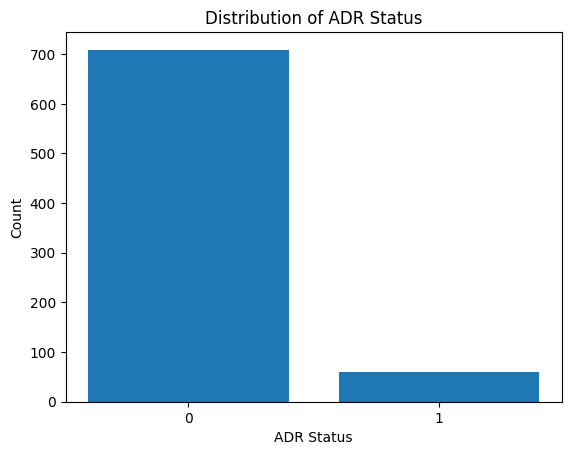

In [ ]:


# Create a bar chart
plt.bar(adr_counts.index, adr_counts.values)
plt.xlabel('ADR Status')
plt.ylabel('Count')
plt.title('Distribution of ADR Status')

# Set the x-ticks to start from 0
plt.xticks(range(len(adr_counts)), adr_counts.index)

plt.show()


In [ ]:
import re

# Assuming you have a DataFrame 'df' with a 'drug_id' column
df1['Drug'] = df1['drug_id'].apply(lambda x: x.split('.')[0])



<ipython-input-27-5dd584890ccb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Drug'] = df1['drug_id'].apply(lambda x: x.split('.')[0])


In [ ]:
df1

,index,comment_index,comment_id,drug_id,rating,disorder,side-effect,comment,gender,age,dosage_duration,date,category,tokens,filtered_tokens,stemmed_tokens,lemmatized_tokens,ADR_Status,ADR_Status_encoded,Drug
0,1,372,1,lexapro.1,1,depression and anxiety,"extreme weight gain, short-term memory loss, h...",i am detoxing from lexapro now i slowly cut my...,F,39.0,5 years20mg 1X D,2011-02-21 00:00:00,ssri,"[i, am, detoxing, from, lexapro, now, i, slowl...","[detoxing, lexapro, slowly, cut, dosage, sever...","[detox, lexapro, slowli, cut, dosag, sever, mo...","[detox, lexapro, slowli, cut, dosag, sever, mo...",ADR,0,lexapro
1,2,4,2,lexapro.2,1,depression,COMPLETELY DESTROYED SEXUALLY FUNCTIONING - EV...,just two tablets of lexapro 10mg completely de...,M,40.0,2 days10mg 1X D,2016-08-21 00:00:00,ssri,"[just, two, tablets, of, lexapro, 10mg, comple...","[two, tablets, lexapro, 10mg, completely, dest...","[two, tablet, lexapro, 10mg, complet, destroy,...","[two, tablet, lexapro, 10mg, complet, destroy,...",ADR,0,lexapro
2,3,419,3,lexapro.3,1,depression,"Nausea, Blurred Vision, 3 to 5 hours sleep, Su...",be careful with this medication this was my f...,M,50.0,2 days10mg 1X D,2010-10-04 00:00:00,ssri,"[be, careful, with, this, medication, this, wa...","[careful, medication, first, antidepressant, m...","[care, medic, first, antidepress, medic, scari...","[care, medic, first, antidepress, medic, scari...",ADR,0,lexapro
3,4,1305,4,lexapro.4,1,"severe gad, minor depression, etc","Plenty! First 10 days were HORRIBLE, like a lo...",it didnt help me out at all my anxiety is wors...,M,20.0,7 weeks,2007-07-05 00:00:00,ssri,"[it, didnt, help, me, out, at, all, my, anxiet...","[didnt, help, anxiety, worse, ive, getting, di...","[didnt, help, anxieti, wors, ive, get, dizzi, ...","[didnt, help, anxieti, wors, ive, get, dizzi, ...",ADR,0,lexapro
4,5,909,5,lexapro.5,1,"depression, anxiety","Chronic cough, weight gain, no sexual interest...",i would not suggest taking this medication i d...,F,43.0,2 months,2008-10-04 00:00:00,ssri,"[i, would, not, suggest, taking, this, medicat...","[would, suggest, taking, medication, experienc...","[would, suggest, take, medic, experi, relief, ...","[would, suggest, take, medic, experi, relief, ...",ADR,0,lexapro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1860,224,effexorXR.224,5,severe anxiety/depression,"Eyes dialated, Sweating, Nausea, Insomnia, Los...",i almost lost everyone in my life that i loved...,F,24.0,2 months,2004-08-30 00:00:00,snri,"[i, almost, lost, everyone, in, my, life, that...","[almost, lost, everyone, life, loved, cared, s...","[almost, lost, everyon, life, love, care, simp...","[almost, lost, everyon, life, love, care, simp...",ADR,0,effexorXR
887,888,1459,225,effexorXR.225,5,depression after car accident,"thirsty at times, no labido",as good as it gets at a price,M,NaN,NaN,5/18/2006Email,snri,"[as, good, as, it, gets, at, a, price]","[good, gets, price]","[good, get, price]","[good, get, price]",Non-ADR,1,effexorXR
888,889,1494,226,effexorXR.226,5,depression/mood swings,I am tired all day long/low energy. Start yaw...,no longer have crying jags able to deal with ...,F,35.0,1 days,2006-03-12 00:00:00,snri,"[no, longer, have, crying, jags, able, to, dea...","[longer, crying, jags, able, deal, anxiety, be...","[longer, cri, jag, abl, deal, anxieti, better,...","[longer, cri, jag, abl, deal, anxieti, better,...",ADR,0,effexorXR
889,890,1028,227,effexorXR.227,5,depression/ocd- negative obsessions,"Stomach problems early on: bloating, nausea, c...",i have been taking 75mg dosage for a year now ...,M,32.0,1 years,2007-05-20 00:00:00,snri,"[i, have, been, taking, 75mg, dosage, for, a, ...","[taking, 75mg, dosage, year, greatly, improved...","[take, 75mg, dosag, year, greatli, improv, dep...","[take, 75mg, dosag, year, greatli, improv, dep...",ADR,0,effexorXR


In [ ]:
df1['Drug'].unique()

array(['lexapro', 'zoloft', 'cymbalta', 'EffexorXR', 'effexorXR'],
      dtype=object)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'common_name' column for common drug names
# Replace various case variations with a common name

df1['Drug'] = df1['Drug'].str.lower()  # Convert to lowercase
df1['Drug'] = df1['Drug'].replace({'Effexorxr': 'effexorXR'}, regex=True)


<ipython-input-30-795e70318c6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Drug'] = df1['Drug'].str.lower()  # Convert to lowercase
<ipython-input-30-795e70318c6d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Drug'] = df1['Drug'].replace({'Effexorxr': 'effexorXR'}, regex=True)


In [ ]:
grouped = df1.groupby(['Drug', 'ADR_Status_encoded']).size().unstack(fill_value=0)


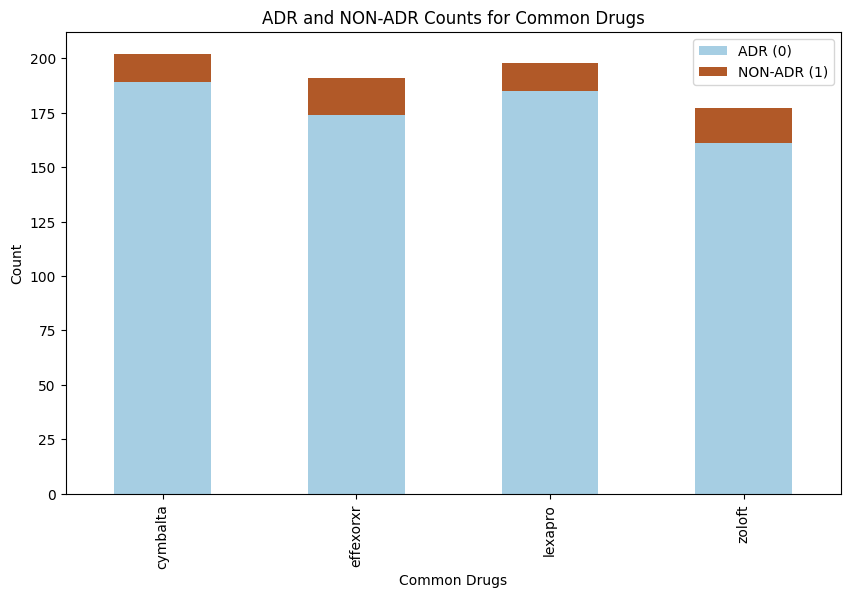

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'common_name' column for common drug names
# and an 'adr_status' column with values 0 for ADR and 1 for NON-ADR

# Group and count ADR (0) and NON-ADR (1) cases
grouped = df1.groupby(['Drug', 'ADR_Status_encoded']).size().unstack(fill_value=0)

# Create the grouped bar chart
ax = grouped.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))

# Add labels and title
plt.xlabel('Common Drugs')
plt.ylabel('Count')
plt.title('ADR and NON-ADR Counts for Common Drugs')

# Set the legend for the ADR (0) and NON-ADR (1) labels
legend_labels = ['ADR (0)', 'NON-ADR (1)']
plt.legend(legend_labels, loc='upper right')

# Display the plot
plt.show()
